#### Import required libraries

In [467]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data


In [496]:
#df = pd.read_csv("FloodPrediction.csv")

#display(df.head(10))
df = pd.read_csv("FloodTrain.csv")
test = pd.read_excel("FloodTest.xlsx")
test_ids = test["Sl"]
test_sn = test["Station_Names"]
test_m = test["Month"]
test_year = test["Year"]

display(df.head(10))

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN
9,9,Barisal,1949,10,34.0,24.7,128.0,78.0,0.490741,3.1,7.000000,41950,536809.8,510151.9,22.7,90.36,4,1949.10,NaN


#### Data Preprocessing

In [497]:
df['Flood'] = df['Flood'].fillna(0)
df.isnull().sum()

Sl                   0
Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
Flood                0
dtype: int64

In [498]:
test.isnull().sum()

Sl                      0
Station_Names           0
Year                    0
Month                   0
Max_Temp              277
Min_Temp              300
Rainfall              277
Relative_Humidity    1932
Wind_Speed           1932
Cloud_Coverage       1932
Bright_Sunshine      1932
Station_Number          0
X_COR                   0
Y_COR                   0
LATITUDE                0
LONGITUDE               0
ALT                     0
Period                  0
dtype: int64

In [499]:
import math
test['Max_Temp'].fillna(test['Max_Temp'].median(), inplace=True)
test['Min_Temp'].fillna(test['Min_Temp'].median(), inplace=True)
test['Rainfall'].fillna(test['Rainfall'].median(), inplace=True)
test['Relative_Humidity'].fillna(df['Relative_Humidity'].median(), inplace=True)
test['Wind_Speed'].fillna(df['Wind_Speed'].median(), inplace=True)
test['Cloud_Coverage'].fillna(df['Cloud_Coverage'].median(), inplace=True)
test['Bright_Sunshine'].fillna(df['Bright_Sunshine'].median(), inplace=True)
test.isnull().sum()

Sl                   0
Station_Names        0
Year                 0
Month                0
Max_Temp             0
Min_Temp             0
Rainfall             0
Relative_Humidity    0
Wind_Speed           0
Cloud_Coverage       0
Bright_Sunshine      0
Station_Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

In [500]:
test.dtypes

Sl                     int64
Station_Names         object
Year                   int64
Month                  int64
Max_Temp             float64
Min_Temp             float64
Rainfall             float64
Relative_Humidity    float64
Wind_Speed           float64
Cloud_Coverage       float64
Bright_Sunshine      float64
Station_Number         int64
X_COR                float64
Y_COR                float64
LATITUDE             float64
LONGITUDE            float64
ALT                    int64
Period               float64
dtype: object

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sl                 20544 non-null  int64  
 1   Station_Names      20544 non-null  object 
 2   Year               20544 non-null  int64  
 3   Month              20544 non-null  int64  
 4   Max_Temp           20544 non-null  float64
 5   Min_Temp           20544 non-null  float64
 6   Rainfall           20544 non-null  float64
 7   Relative_Humidity  20544 non-null  float64
 8   Wind_Speed         20544 non-null  float64
 9   Cloud_Coverage     20544 non-null  float64
 10  Bright_Sunshine    20544 non-null  float64
 11  Station_Number     20544 non-null  int64  
 12  X_COR              20544 non-null  float64
 13  Y_COR              20544 non-null  float64
 14  LATITUDE           20544 non-null  float64
 15  LONGITUDE          20544 non-null  float64
 16  ALT                205

In [502]:
print(df['Flood'].unique())


[0. 1.]


#### Label Encoding

In [503]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
columns = ['Station_Names']

for col in columns:
    df[col]=le.fit_transform(df[col])
    test[col] = le.transform(test[col])
print(le.classes_)
   

['Barisal' 'Bhola' 'Bogra' 'Chandpur' 'Chittagong (City-Ambagan)'
 'Chittagong (IAP-Patenga)' 'Comilla' "Cox's Bazar" 'Dhaka' 'Dinajpur'
 'Faridpur' 'Feni' 'Hatiya' 'Ishurdi' 'Jessore' 'Khepupara' 'Khulna'
 'Kutubdia' 'Madaripur' 'Maijdee Court' 'Mongla' 'Mymensingh' 'Patuakhali'
 'Rajshahi' 'Rangamati' 'Rangpur' 'Sandwip' 'Satkhira' 'Sitakunda'
 'Srimangal' 'Sylhet' 'Tangail' 'Teknaf']


In [504]:
df.head()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
0,0,0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,0.0
1,1,0,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,0.0
2,2,0,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,0.0
3,3,0,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,0.0
4,4,0,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,0.0


#### Find Correlation Between The Variables

In [505]:
df_cor = df.corr()

display(df_cor)

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood
Sl,1.000000,9.989069e-01,1.264266e-01,5.820804e-04,0.019364,-0.031654,0.058593,0.014866,-0.094160,0.008197,-0.025470,-7.997625e-02,1.285784e-01,9.238140e-02,7.856532e-02,1.080136e-01,2.818770e-01,0.126428,-0.015394
Station_Names,0.998907,1.000000e+00,9.380154e-02,-5.014113e-15,0.014658,-0.032917,0.059868,0.013504,-0.092686,0.008490,-0.022052,-7.660478e-02,1.392109e-01,8.939321e-02,7.578948e-02,1.193717e-01,2.861327e-01,0.093801,-0.014751
Year,0.126427,9.380154e-02,1.000000e+00,-5.258512e-16,0.086210,0.050232,0.030456,0.091891,0.044258,0.006604,-0.083561,1.089689e-01,3.488473e-02,-1.190950e-01,-1.121100e-01,5.307237e-02,-7.611529e-02,0.999998,0.028163
Month,0.000582,-5.014113e-15,-5.258512e-16,1.000000e+00,-0.066337,0.233238,0.131826,0.419832,-0.155221,0.168033,-0.210787,1.544839e-15,-6.647636e-16,-4.195910e-16,-3.514922e-16,-5.632437e-16,-1.939173e-15,0.001960,0.105497
Max_Temp,0.019364,1.465847e-02,8.621033e-02,-6.633672e-02,1.000000,0.698916,0.256849,0.028744,0.308024,0.463165,-0.127072,-6.608043e-02,-1.275104e-01,5.528063e-02,5.789752e-02,-1.268460e-01,2.932317e-02,0.086080,0.135808
Min_Temp,-0.031654,-3.291673e-02,5.023233e-02,2.332379e-01,0.698916,1.000000,0.595176,0.538171,0.382957,0.828193,-0.514024,1.245563e-01,4.184944e-02,-1.270355e-01,-1.291222e-01,4.506379e-02,-8.973014e-02,0.050689,0.412115
Rainfall,0.058593,5.986835e-02,3.045589e-02,1.318256e-01,0.256849,0.595176,1.000000,0.592001,0.319578,0.765955,-0.676019,1.147305e-01,1.897868e-01,-1.055198e-01,-1.060542e-01,1.972219e-01,-1.499920e-02,0.030714,0.768816
Relative_Humidity,0.014866,1.350398e-02,9.189131e-02,4.198320e-01,0.028744,0.538171,0.592001,1.000000,0.095788,0.659697,-0.666537,1.324441e-01,1.356221e-01,-1.216152e-01,-1.257725e-01,1.379015e-01,-8.435432e-02,0.092714,0.459616
Wind_Speed,-0.094160,-9.268569e-02,4.425801e-02,-1.552212e-01,0.308024,0.382957,0.319578,0.095788,1.000000,0.388748,-0.174459,2.288811e-01,9.384981e-02,-2.248008e-01,-2.147945e-01,1.213800e-01,-1.449668e-01,0.043954,0.217552
Cloud_Coverage,0.008197,8.490291e-03,6.604325e-03,1.680327e-01,0.463165,0.828193,0.765955,0.659697,0.388748,1.000000,-0.743366,2.875881e-02,6.032982e-02,-2.563907e-02,-2.563207e-02,6.318079e-02,2.804592e-03,0.006934,0.573665


#### Heatmap of Correlation

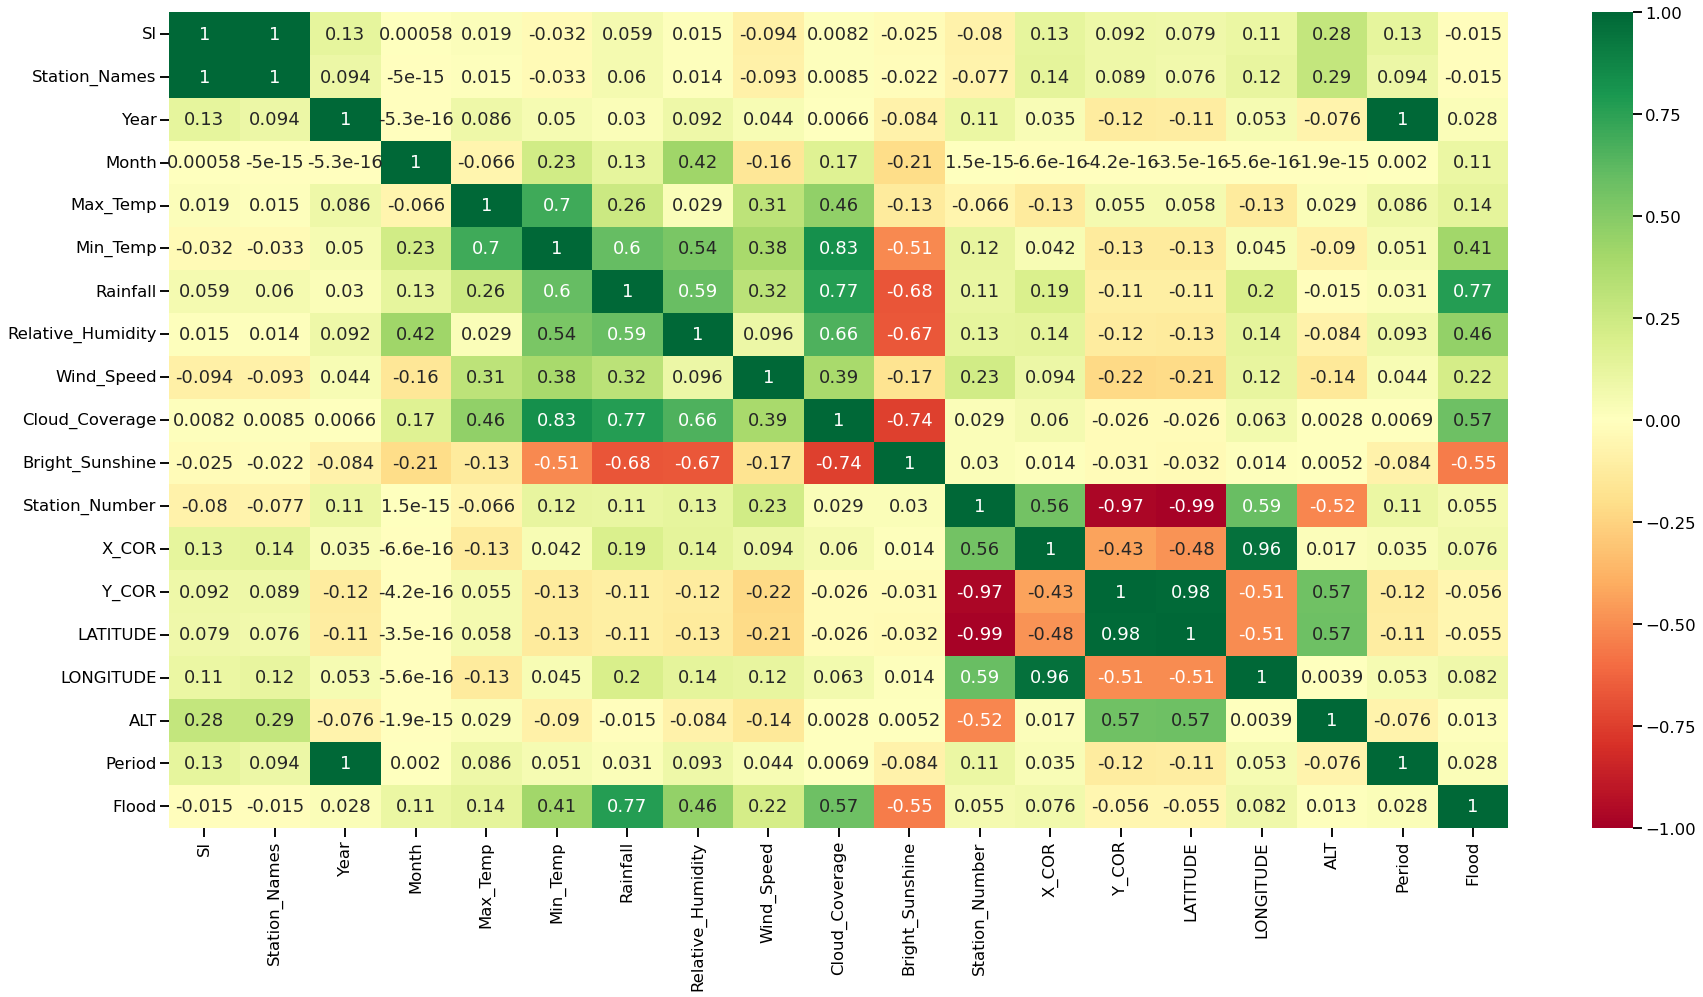

In [506]:
plt.figure(figsize=(30,15))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.show()

#### Time Series

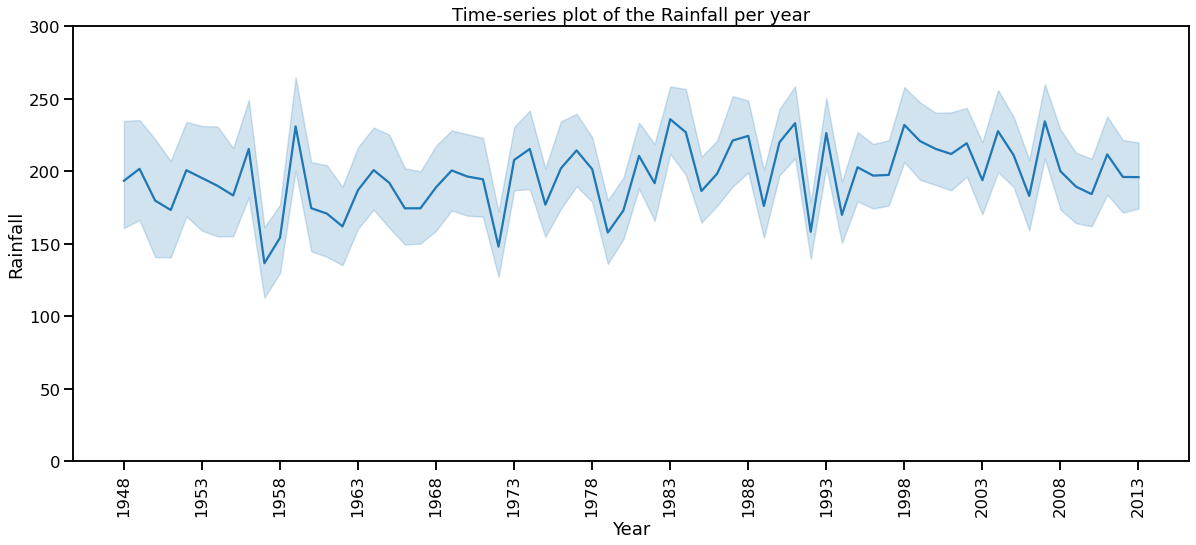

In [569]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Year', y='Rainfall')

plt.title("Time-series plot of the Rainfall per year")
plt.xlabel("Year")
plt.xticks(np.arange(df['Year'].min(), df['Year'].max()+5, 5), rotation=90)
#plt.yticks(np.arange(0, df['Rainfall'].max()+10, 5))
plt.yticks(np.arange(0, 300+10, 50))
#plt.xticks(np.arange(1949, 2013+5, 5)) 

plt.show()

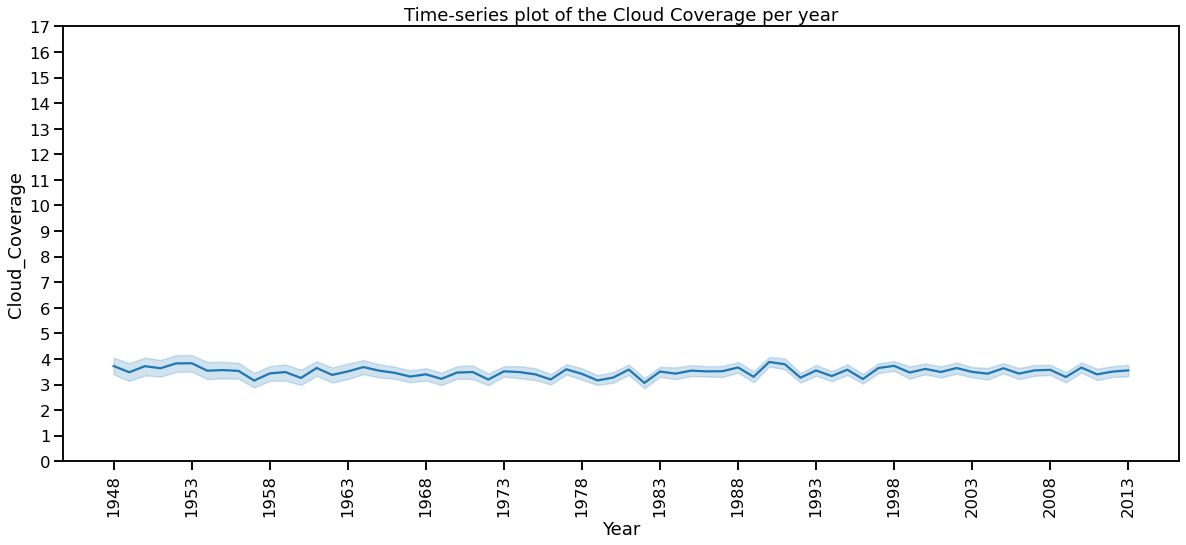

In [553]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Year', y='Cloud_Coverage')

plt.title("Time-series plot of the Cloud Coverage per year")
plt.xlabel("Year")
plt.xticks(np.arange(df['Year'].min(), df['Year'].max()+5, 5), rotation=90)
plt.yticks(np.arange(0, df['Cloud_Coverage'].max()+10, 1))


plt.show()

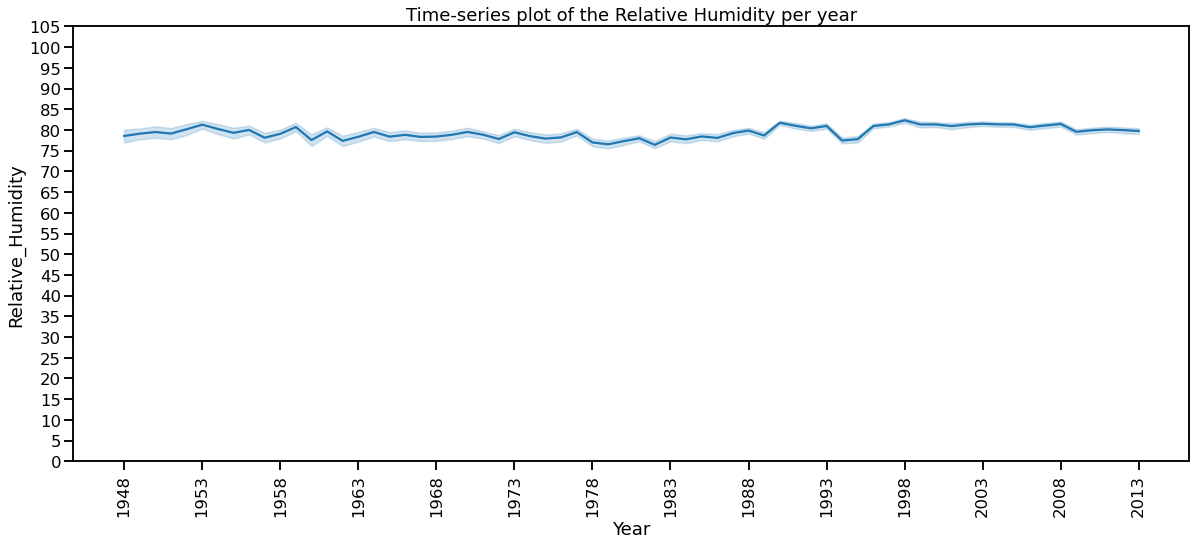

In [555]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Year', y='Relative_Humidity')

plt.title("Time-series plot of the Relative Humidity per year")
plt.xlabel("Year")
plt.xticks(np.arange(df['Year'].min(), df['Year'].max()+5, 5), rotation=90)
plt.yticks(np.arange(0, df['Relative_Humidity'].max()+10, 5))

plt.show()

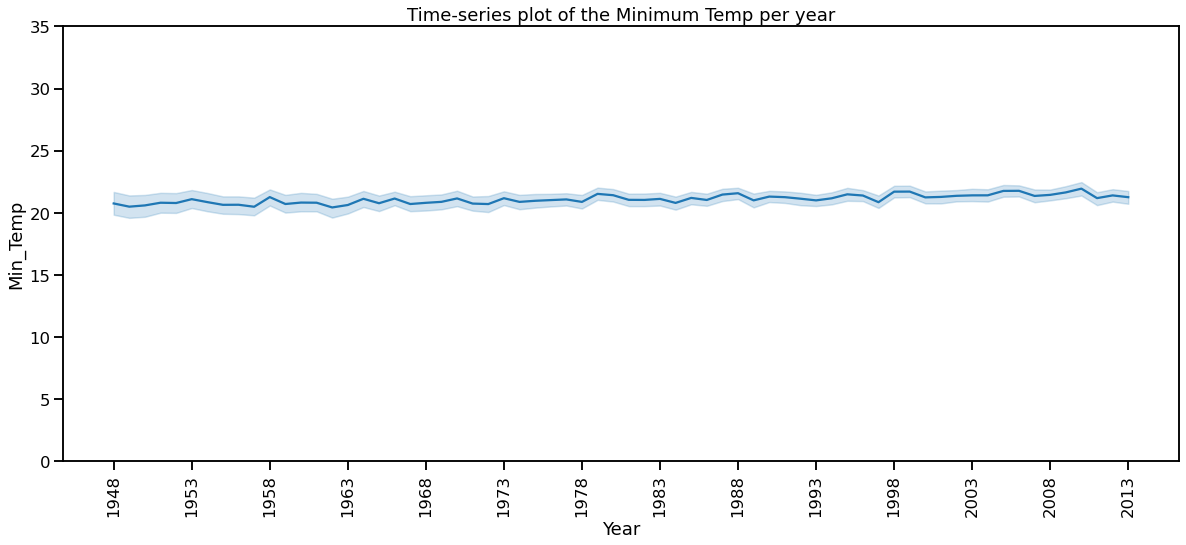

In [556]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df, x='Year', y='Min_Temp')

plt.title("Time-series plot of the Minimum Temp per year")
plt.xlabel("Year")
plt.xticks(np.arange(df['Year'].min(), df['Year'].max()+5, 5), rotation=90)
plt.yticks(np.arange(0, df['Min_Temp'].max()+10, 5))

plt.show()

#### Target variable 

In [508]:
df['Flood'].value_counts()

0.0    16412
1.0     4132
Name: Flood, dtype: int64

#### Feature and target variable separation

#### Train test separation

In [509]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df["Flood"]
X = df.drop("Flood", axis=1)#Heatmap correlation high

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Distict wise
valu shoho. without
decision tree plot

#### Training Models

In [510]:
clf = LogisticRegression(random_state=0, max_iter=100000).fit(X_train, y_train)

#model = DecisionTreeClassifier()
#model = RandomForestClassifier()
#model = model.fit(X_train, y_train)

#### Prediction

In [518]:
#y_pred = model.predict(X_val)

predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)



0.949379411048917

In [519]:
submission_preds = clf.predict(test)

In [521]:
data = pd.DataFrame({"Sl": test_ids.values,"Station_Names": test_sn.values,"Year":test_year.values,"Month":test_m.values,
                 "Flood": submission_preds,
                    })



In [522]:
data.to_csv("FloodPredictionBD.csv", index=False)

#### Prediction Comparison with the test data

In [ ]:
#y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
#y_test['predicted_Flood'] = y_pred

#display(y_test.sample(10))

In [ ]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

#### Confusion Matrix

In [85]:
confusion_matrix_ = confusion_matrix(y_test['Flood?'], 
                                     y_test['predicted_Flood?'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[4851   73]
 [  81 1159]]


In [86]:
y_test['Flood?'].value_counts()

0.0    4924
1.0    1240
Name: Flood?, dtype: int64

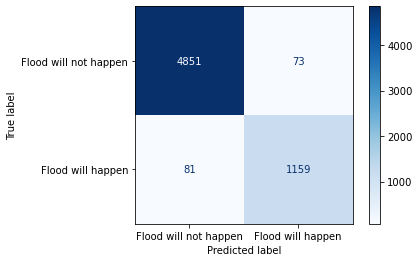

In [87]:
plot_confusion_matrix(model, X_test, y_test['Flood?'], display_labels=["Flood will not happen", "Flood will happen"],cmap='Blues')
plt.show()

In [88]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  4851
False Negatives =  81
False Positives =  73
True Positives =  1159


#### Accuracy

In [89]:
print("Calculated __________________________")
# calculate the accuracy of the model from the confusion matrix
accuracy = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy: ', accuracy)

print("\nScikit-Learn ________________________")
# calculate the accuracy of the model using the sklearn built-in function
accuracy_ = accuracy_score(y_test['Flood?'], 
                           y_test['predicted_Flood?'])

print('Accuracy: ', accuracy_)

Calculated __________________________
Accuracy:  0.9750162232316677

Scikit-Learn ________________________
Accuracy:  0.9750162232316677


In [90]:
print("Calculated __________________________")
precision = np.round(TP/(TP+FP), 2)
recall = np.round(TP/(TP+FN), 2)
f1_score_ = np.round((2*precision*recall)/(precision+recall), 2)

print("Precision = ", precision)
print("Recall = ", recall)
print("f1 score = ", f1_score_)

print("\nScikit-Learn ________________________")
precision_ = np.round(precision_score(y_test['Flood?'], 
                                      y_test['predicted_Flood?']), 2)
recall_ = np.round(recall_score(y_test['Flood?'], 
                                y_test['predicted_Flood?']), 2)
f1_score__ = np.round(f1_score(y_test['Flood?'], 
                               y_test['predicted_Flood?']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Calculated __________________________
Precision =  0.94
Recall =  0.93
f1 score =  0.93

Scikit-Learn ________________________
Precision =  0.94
Recall =  0.93
f1 score =  0.94


#### True Positive Rate, False Positive Rate

In [91]:
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.93
False Positive Rate =  0.01


#### ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

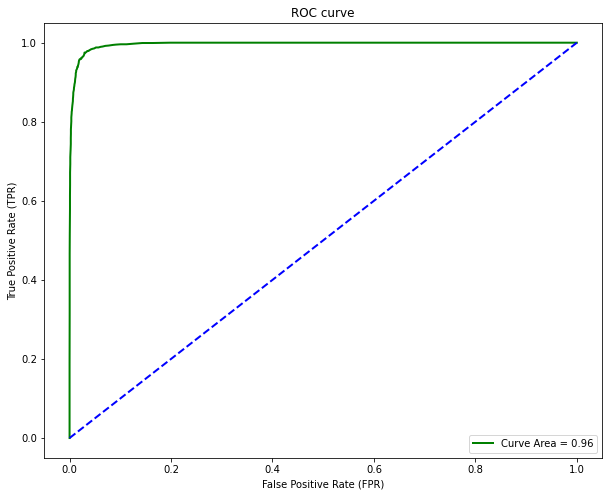

In [92]:
fpr, tpr, thr = roc_curve(y_test['Flood?'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Flood?'], 
                             y_test['predicted_Flood?']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Classification report

In [93]:
class_report = classification_report(y_test['Flood?'], 
                                     y_test['predicted_Flood?'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      4924
         1.0       0.94      0.93      0.94      1240

    accuracy                           0.98      6164
   macro avg       0.96      0.96      0.96      6164
weighted avg       0.97      0.98      0.97      6164

